In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [229]:
df=pd.read_csv('Orange_Telecom_Churn_Data.csv')

In [230]:
df['intl_plan'] = df.intl_plan.map({'yes':1, 'no':0})

In [231]:
df['voice_mail_plan'] = df.voice_mail_plan.map({'yes':1, 'no':0})

In [232]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


(array([0, 1]), <a list of 2 Text xticklabel objects>)

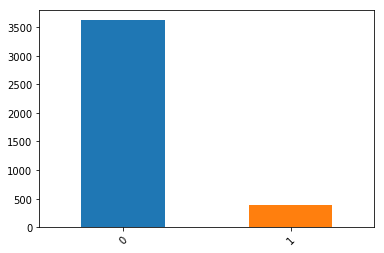

In [233]:
df1=df['intl_plan'].value_counts()
df1.plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

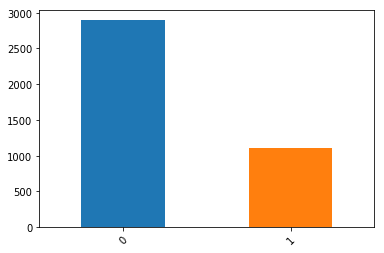

In [234]:
df1=df['voice_mail_plan'].value_counts()
df1.plot(kind='bar')
plt.xticks(rotation=45)

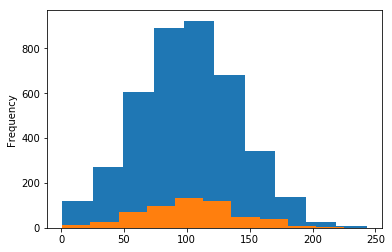

In [235]:
df['account_length'].plot(kind='hist')
df['account_length'][df['churned']==1].plot(kind='hist')

In [236]:
chrn = pd.crosstab(df['area_code'],df['churned'])

In [237]:
chrn['total']=chrn.sum(axis=1)
chrn

churned,False,True,total
area_code,,,
408,860,144,1004
415,1707,276,1983
510,867,146,1013


In [238]:
chrn=chrn.apply(lambda x: round(100* x/chrn['total']))

In [239]:
chrn.drop('total',axis=1,inplace=True)

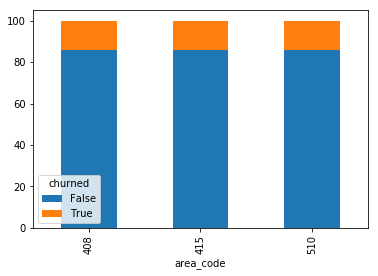

In [240]:
chrn.plot(kind='bar' , stacked=True)

In [247]:
chrn1 = pd.crosstab(df['intl_plan'],df['churned'])


In [248]:
chrn1['total']=chrn1.sum(axis=1)

In [249]:
chrn1

churned,False,True,total
intl_plan,,,
0,3207,413,3620
1,227,153,380


In [250]:
chrn1=chrn1.apply(lambda x: round(100* x/chrn1['total']))

In [251]:
chrn1.drop('total',axis=1,inplace=True)

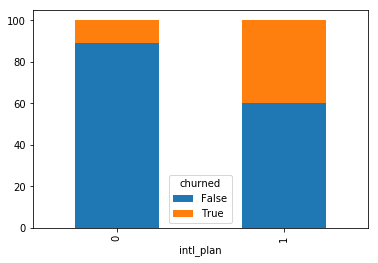

In [252]:
chrn1.plot(kind='bar' , stacked=True)

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
training_data = df[['intl_plan' , 'area_code']]

In [258]:
output_data = df['churned']

In [259]:
X_train , x_test , Y_train , y_test = train_test_split(training_data , output_data , test_size=0.3 ,random_state=5)

In [260]:
from sklearn.linear_model import LogisticRegression

In [261]:
model = LogisticRegression()

In [262]:
model.fit(X_train,Y_train)

C:\Users\KARAN SIKARWAR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [263]:
predictions = model.predict(x_test)

In [264]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [265]:
accuracy_score(predictions,y_test)

0.855

In [266]:
confusion_matrix(predictions,y_test)

array([[1026,  174],
       [   0,    0]], dtype=int64)

In [267]:
from sklearn.neighbors import KNeighborsClassifier

In [268]:
model = KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)

In [269]:
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [270]:
y_pred = model.predict(x_test)

In [271]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [272]:
accuracy_score(y_pred,y_test)

0.8575

In [273]:
confusion_matrix(y_pred,y_test)

array([[1012,  157],
       [  14,   17]], dtype=int64)

In [274]:
from sklearn.model_selection import GridSearchCV

In [275]:
parameters = {'n_neighbors':[1,10 ,5]}

In [277]:
grid = GridSearchCV(model , parameters , cv=10)

In [278]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': [1, 10, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [280]:
predictions =  grid.predict(x_test)

In [281]:
grid.best_params_

{'n_neighbors': 10}

In [283]:
accuracy_score(y_test,predictions)

0.8575